In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-absstab-advection)

For $c=1$ we get purely imaginary eigenvalues.

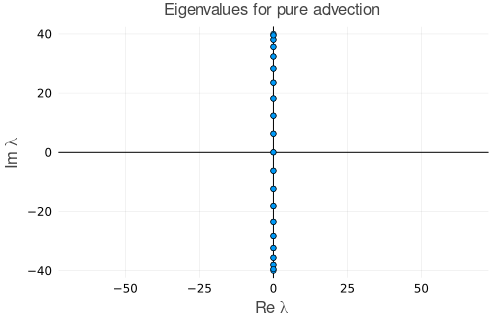

In [2]:
x, Dₓ = FNC.diffper(40, [0, 1])
λ = eigvals(Dₓ);
scatter(real(λ), imag(λ);
    aspect_ratio = 1,  frame=:zerolines,
    xlabel="Re λ",  ylabel="Im λ", 
    title="Eigenvalues for pure advection",  legend=:none)

Let's choose a time step of $\tau=0.1$ and compare to the stability regions of the Euler and backward Euler time steppers (shown as shaded regions):

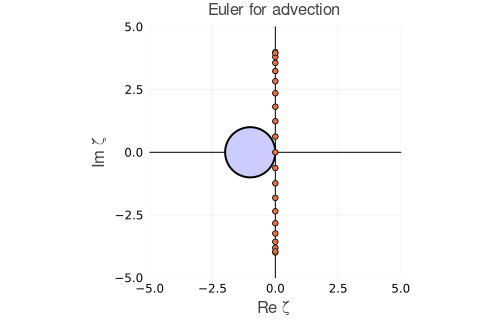

In [3]:
zc = @. cispi(2 * (0:360) / 360);     # points on |z|=1
z = zc .- 1;                          # shift left by 1
plot(Shape(real(z), imag(z)), color=RGB(.8, .8, 1))
ζ = 0.1 * λ
scatter!(real(ζ), imag(ζ);
    aspect_ratio=1,  frame=:zerolines,
    xaxis=("Re ζ", [-5, 5]),  yaxis=("Im ζ", [-5, 5]),
    title="Euler for advection")

In the Euler case it's clear that *no* real value of $\tau>0$ is going to make $\zeta$ values fit within the stability region. Any method whose stability region includes none of the imaginary axis is an unsuitable choice for advection.

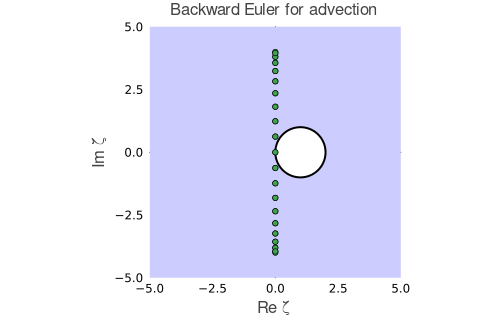

In [4]:
z = zc .+ 1;                        # shift circle right by 1
plot(Shape([-6, 6, 6, -6], [-6, -6, 6, 6]), color=RGB(.8, .8, 1))
plot!(Shape(real(z), imag(z)), color=:white)
scatter!(real(ζ), imag(ζ);
    aspect_ratio=1,  frame=:zerolines,
    xaxis=("Re ζ", [-5, 5]),  yaxis=("Im ζ", [-5, 5]),
    title="Backward Euler for advection")

The A-stable backward Euler time stepping tells the exact opposite story: it will be absolutely stable for any choice of the time step $\tau$.